In [236]:
import numpy as np
import pandas as pd


In [237]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [238]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic...",NaN,NaN,NaN
3171,ham,Do u still have plumbers tape and a wrench we ...,NaN,NaN,NaN
4262,ham,Den only weekdays got special price... Haiz......,NaN,NaN,NaN
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN
4695,ham,A guy who gets used but is too dumb to realize...,NaN,NaN,NaN


In [239]:
df.shape

(5572, 5)

# 1. Data Cleaning


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [241]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [242]:
df.sample(5)

,v1,v2
5002,spam,CDs 4u: Congratulations ur awarded å£500 of CD...
4365,ham,Mm yes dear look how i am hugging you both. :-P
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...
5212,ham,K.k.how is your business now?
1590,ham,Somewhr someone is surely made 4 u. And God ha...


In [243]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2661,ham,Do you know when dad will be back?
3467,ham,yay! finally lol. i missed our cinema trip las...
1888,ham,No. On the way home. So if not for the long dr...
4781,ham,"Call me, i am senthil from hsbc."
3461,spam,Bloomberg -Message center +447797706009 Why wa...


In [244]:
print(df.columns)

Index(['target', 'text'], dtype='object')


In [245]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [246]:
#df['target'] = encoder.fit_transform(df['target'])

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Assuming renaming was successful, now you can use 'target' as the column name
df['target'] = encoder.fit_transform(df['target'])


In [247]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [248]:
# missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [249]:
# check for duplicate values
df.duplicated().sum()


403

In [250]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [251]:
df.duplicated().sum()

0

In [252]:
df.shape


(5169, 2)

# 2.EDA  
## Exploratory Data Analysis 


In [253]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [254]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

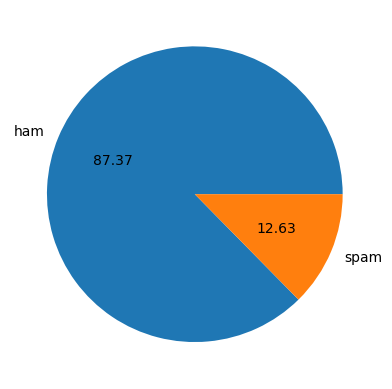

In [255]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [256]:
# Data is imbalanced so balance the data
import nltk

In [257]:
!pip install nltk


In [258]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pradhyumnyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [259]:
df['num_characters'] = df['text'].apply(len)


In [260]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [261]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [262]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [263]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [264]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [265]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [266]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

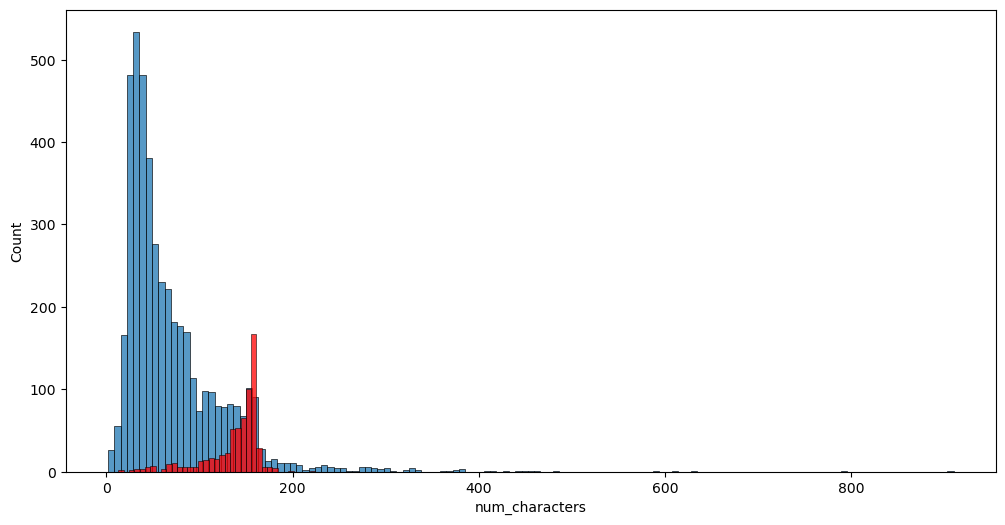

In [267]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

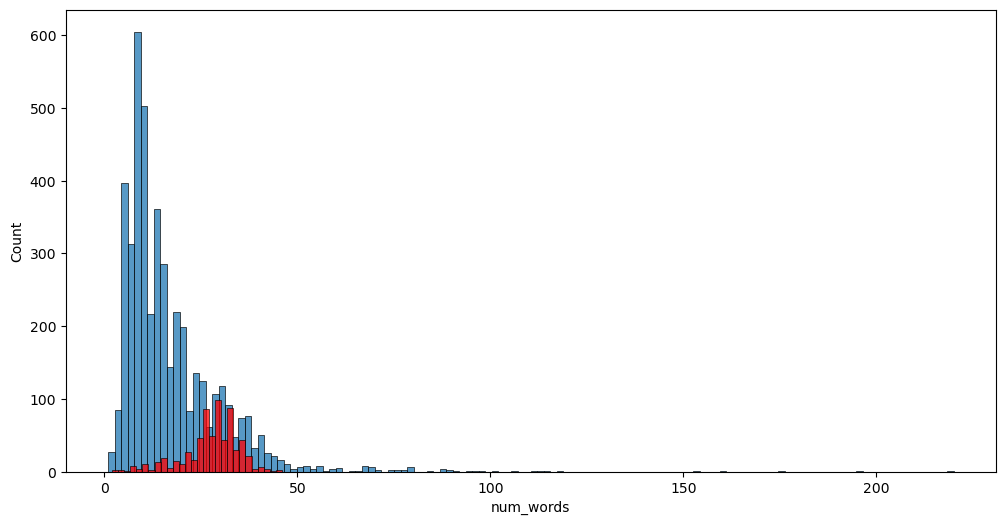

In [268]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/Users/pradhyumnyadav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


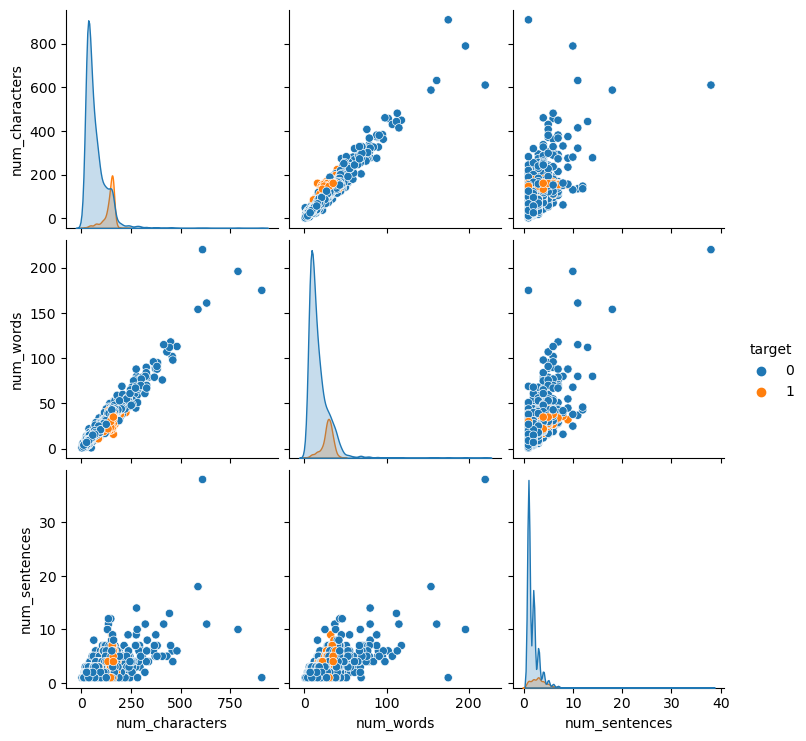

In [269]:
sns.pairplot(df,hue='target')

<Axes: >

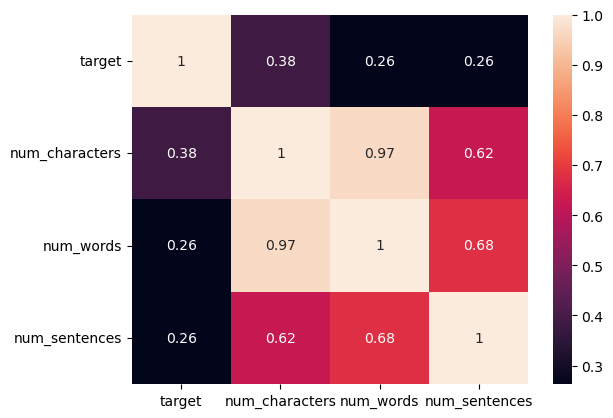

In [270]:
# Assuming 'target' is the column you want to exclude from the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)


# 3. Data Preprocessing


In [271]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the Porter Stemmer
ps = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pradhyumnyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pradhyumnyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [272]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [273]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [274]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [275]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [276]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [277]:
!pip install wordcloud


In [278]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

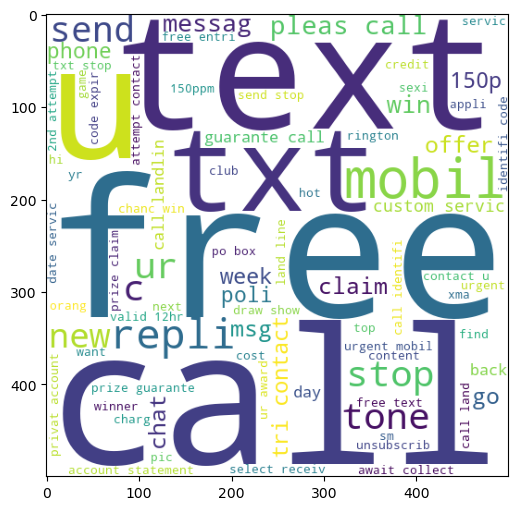

In [279]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [280]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

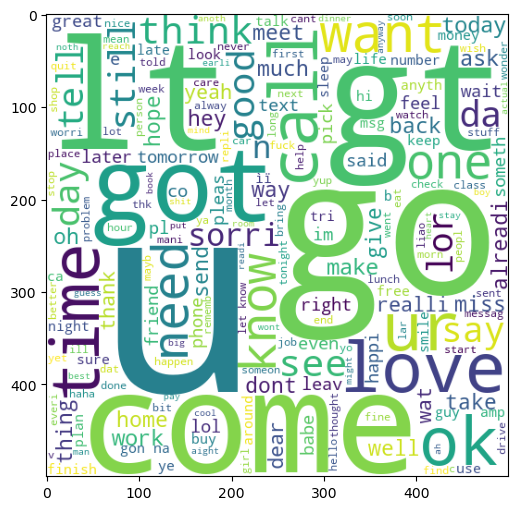

In [281]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [282]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [283]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [284]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [285]:
len(spam_corpus)

9939

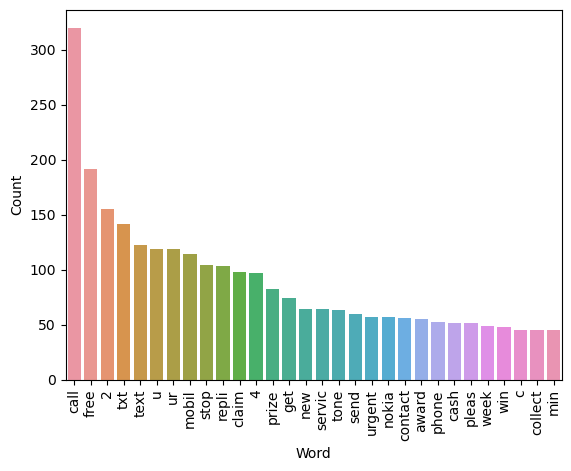

In [288]:
# from collections import Counter


# spam_corpus_lis = spam_corpus[:]
# plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

# spam_corpus_lis = spam_corpus[:]
# plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0].astype(str), pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()
from collections import Counter
import seaborn as sns

spam_corpus_counts = Counter(spam_corpus)
top_words = spam_corpus_counts.most_common(30)

df_top_words = pd.DataFrame(top_words, columns=['Word', 'Count'])

plt.figure()
sns.barplot(x='Word', y='Count', data=df_top_words)
plt.xticks(rotation='vertical', ticks=range(len(df_top_words)))
plt.show()





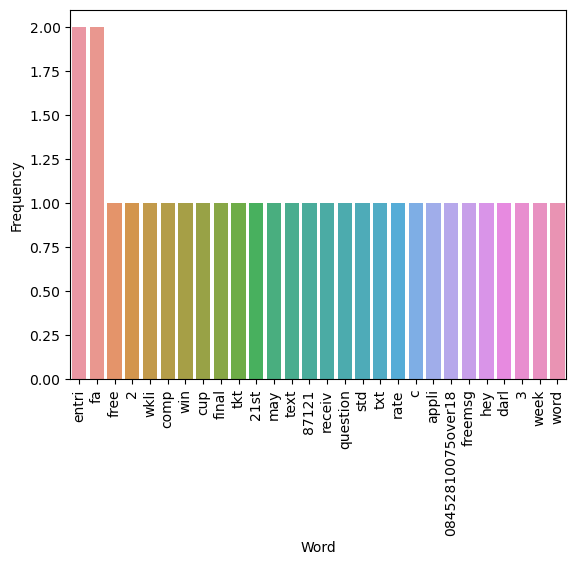

In [289]:

from collections import Counter


# Assuming 'spam_corpus' is your list of words
spam_corpus = spam_corpus[0:30]   #["word1", "word2", "word3", ...]

# Create a Counter object and extract the most common 30 items
counter_data = Counter(spam_corpus).most_common(30)

# Convert the Counter data to a DataFrame
df_counter = pd.DataFrame(counter_data, columns=["Word", "Frequency"])

# Create a barplot using Seaborn
sns.barplot(x="Word", y="Frequency", data=df_counter)
plt.xticks(rotation='vertical')
plt.show()


In [290]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [291]:
len(ham_corpus)

35404

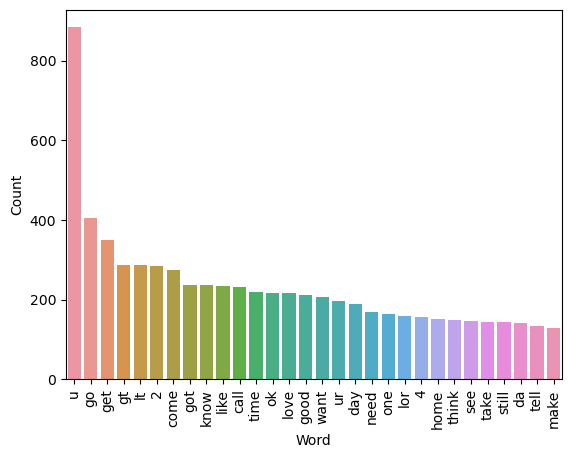

In [294]:
from collections import Counter

# Assuming you have ham_corpus already defined
ham_word_counts = Counter(ham_corpus)
top_ham_words = ham_word_counts.most_common(30)

# Create a DataFrame from the Counter results
df_ham_words = pd.DataFrame(top_ham_words, columns=['Word', 'Count'])

# Plot the bar chart using seaborn
sns.barplot(x='Word', y='Count', data=df_ham_words)
plt.xticks(rotation='vertical')
plt.show()

In [295]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [296]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [297]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [298]:
X.shape

(5169, 3000)

In [299]:
y = df['target'].values

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [302]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [303]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [304]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [305]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [306]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [308]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))